# Example MNIST digits  
Date:  May 25, 2020 Monday  
Author:  Jennifer E Yoon  
Purpose: Test out deep learning setup on Ubuntu, local CPU conda3 "dlpy" env.  
Uses example from Chollet book chapter 2, neural network. 

In [1]:
# imports in alphabetical order, built-ins first, 3rd-party pkgs second.

# built-ins 


# 3rd-party pkgs 
# import keras
from keras.datasets import mnist 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow_datasets as tfds 


Using TensorFlow backend.


In [2]:
# imports my custom pkgs in alphabetical order. 


In [3]:
# standard commands for a Jupyter notebook.  
%matplotlib inline 


### 0. Introduction  - Data Import  
Env: conda3 virtual env "dlpy" on Ubuntu $WSL, CPU local laptop.  
Import MNIST dataset.  
Explore dataset shape and a few point examples.  
Reshape and pre-process to fit selected model.  
Use keras library, cross-entropy model.  

In [4]:
!python --version
print(tf.__version__)
print(tfds.__version__)

Python 3.8.2
2.2.0
3.1.0


In [6]:
# Data Import  
# from keras.datasets import nist (if not already imported above)
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# data downloded to "tensorflow-datasets" path, 
# \\wsl$\Ubuntu\home\jyoon\tensorflow_datasets\mnist\1.0.0

11493376/11490434 [==============================] - 1s 0us/step


In [26]:
# Explore data 
print(train_images.shape)
print(len(train_labels))
print(train_labels)
# print(train_images[1])

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


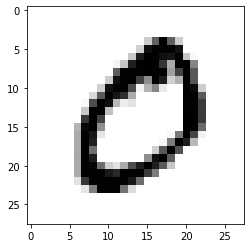

In [27]:
digit = train_images[1]
# import matplotlib.pyplot as plt (if not already imported above)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [30]:
# Convert data from uint8 0..255 to float32 type 0..1 interval. 
# Example model expects input values between [0, 1]. 
train_images = train_images.reshape((60000, 28 * 28))
# 60,000 x 784 shape.
train_images = train_images.astype('float32') / 255
print(train_images[1])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [34]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(test_images[1])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [35]:
# Process the labels 
from keras.utils import to_categorical 

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [36]:
print(train_labels[0])
print(test_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 1. Model Setup    
Uses keras, categorical model. 

In [37]:
# network architecture  
from keras import models
from keras import layers 

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [38]:
# compilation step  
network.compile(optimizer='rmsprop', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])



In [39]:
# Train the model, call to "fit".
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 1.4785 - accuracy: 0.6655
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.5885 - accuracy: 0.8532
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.4119 - accuracy: 0.8881
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3537 - accuracy: 0.9008
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3246 - accuracy: 0.9077


### 2. Section Title  
markdown cell

In [6]:
# code cell

### 3. Section Title  
markdown cell

In [7]:
# code cell

### 4. Section Title  
markdown cell

In [8]:
# code cell

### 5. Section Title  
markdown cell

In [9]:
# code cell